1. **Problem Scoping**
2. **Data Acquisition**
    a. secondary sources - Kaggles, gov website, UN website,github, UCI etc
3. **EDA**
    a. Clean data
    b. Visualise data (you already learned EDA / cleaning)

4. **Choose a model**
    a. Linear Regression
    b. Logisitic Regression
    c. Decision Trees

5. **Train**
    a. Train/Test split
    b. Fit the model on training data

6. **Test**
    a. Make a prediction on test data
    b. Compute performance (accurancy)

7. **Improve Performance**

### Predict House Prices based on house parameters

1. Predict the house prices, based on various parameters
    - The problem is worth solving, because real estate professionals often need help in evaluating the prices of properties

2. Data Acquisition :
    - Use the inbuilt sci-kit learn dataset

3. EDA
    - Clean dataset - it is clean already - but still just recall a bit about cleaning techniques
    - Visualise a little as well

4. Choose a model :
    - Look into data, and we infer that it id a classification problem
    - Linear regression (we are using it here, because it is very simple model)
    - Next iteration, Logistic Regression (We will observe)

6. Testing
    - Make predictions
    - Observe performance using evaluation metrics
    - Regressionevaluation metrics - R2 score, and Mean Absolute Error

7. Reiterate based on performance
    - change the split ratio
    - 

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.linear_model import LinearRegression, LogisticRegression

#Model Training
from sklearn.model_selection import train_test_split

#Model Evaluation
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [3]:
housing_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [15]:
#Input feature
df = pd.DataFrame(housing_data.data, columns = housing_data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [21]:
#Target feature
df['Price']=housing_data.target

About the Dataset :
    - 'MedInc' - Median income of the households in the block
    - 'HouseAge' - The age of the house
    - 'AveRooms' - # of Rooms
    - 'AveBedrms' - # of bed rooms
    - 'Population' - # of people within the blovk of the property
    - 'AveOccup' - # of people living in the housing
    - 'Latitude' -Location coordinate latitude
    - 'Longitude' -Location coordinate longitude
    - 'HousePrice' - Will mention the price of the property

> Exercise :
- turn the price columns into 10 thousand units, i.e multiply

## EDA (Exploratory Data Analysis)
- Explore the data
- Clean the data
- Visualization

In [22]:
df.shape

(20640, 9)

In [23]:
#info is not attribute , it is a menthod
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [24]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [25]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [26]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Price         float64
dtype: object

## No cleaning needed. Already cleaned

## Visualization

In [ ]:
#specify the default for the visualizations

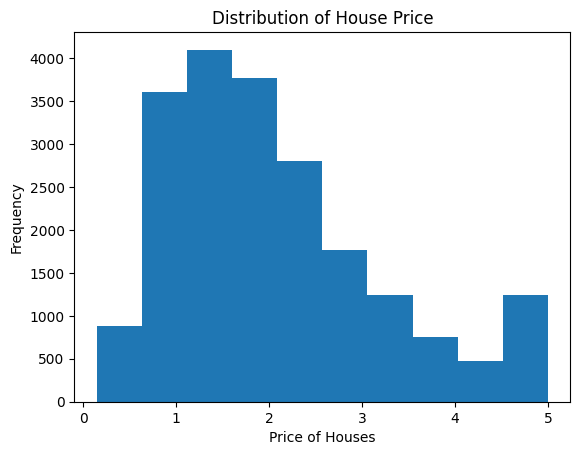

In [ ]:
plt.hist(df['Price'])

#import stuff should always keep for visualization
plt.title('Distribution of House Price')
plt.xlabel('Price of Houses')
plt.ylabel('Frequency')
plt.show() # need when using script

In [32]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

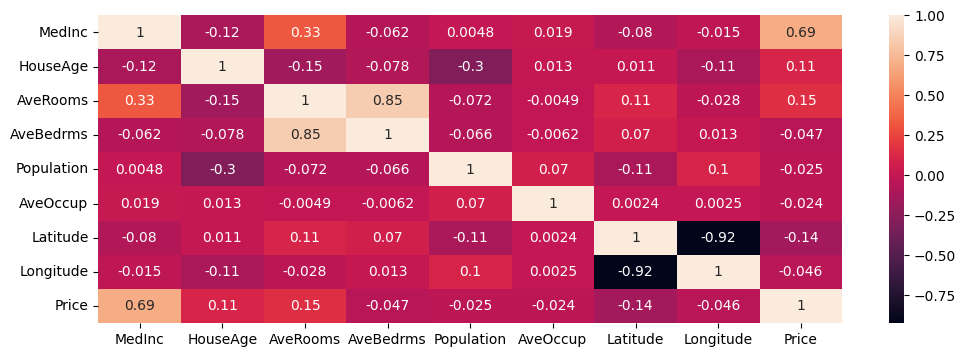

In [34]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)

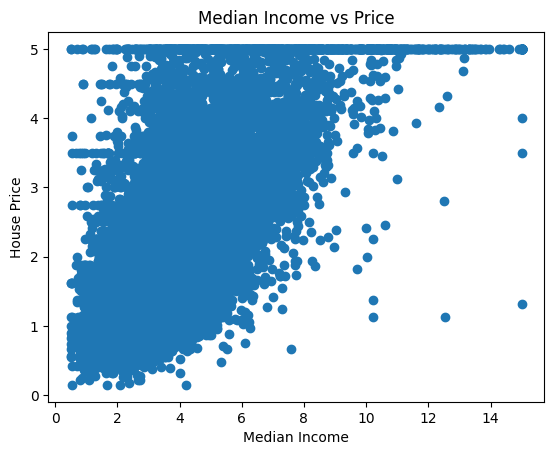

In [36]:
plt.scatter(df['MedInc'],df['Price'])

plt.title('Median Income vs Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()

## Insight

- Insight needed for machine learning later

> Execise
- to make better visualization
- Get more insight and record them
- To create all the visualization in single plot, using subplot and figsize to manipulate visualizations

## Step 4 : Choosing the Model

- Choosing Linear Regression

- Linear Regression
- How it works

In [ ]:
model = linearRegression()
model

## Step 5 : Training
- Train Test split of fata
- Fit the model with data

In [46]:
#Python
#SPlit data

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.2, random_state =42)

In [41]:
#input feature
X = df[['MedInc','HouseAge','AveRooms','AveBedrms','Population']]

#target feature
y = df['Price']

In [42]:
#iloc

x_train= X.iloc[0:15000]
y_train= y.iloc[0:15000]

#Rest for
X_test = X.iloc[15000:]
y_test = y.iloc[15000:]

In [48]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#seed - in random package?
#replicate the result

In [ ]:
###

In [49]:
#fit the data in the model

model.fit(x_train,y_train)

NameError: name 'model' is not defined

In [ ]:
model.coef
df.

In [ ]:
#check which 
feature_importance = pd.DataFrame({
    'features':housing_data.feature_name,
    'Model Coefficients' : model.coef_
}).sortvalue('Model Coefficient', ascending=False)

feature_importance

## Step 6 : Testing
- Make prediction
- Evaluation

In [ ]:
#fit the data
